In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections as cl
import math

In [ ]:
step_range=[2**-p for p in range(13)]
print(step_range)

[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625]


In [ ]:
price={}
for s in step_range:
    price[s]=pd.read_csv(f'./Outputs/period_6_timestep_{s}.csv',usecols=['TIME','Electricity Tariff'],squeeze=True,index_col=0,dtype='float64')

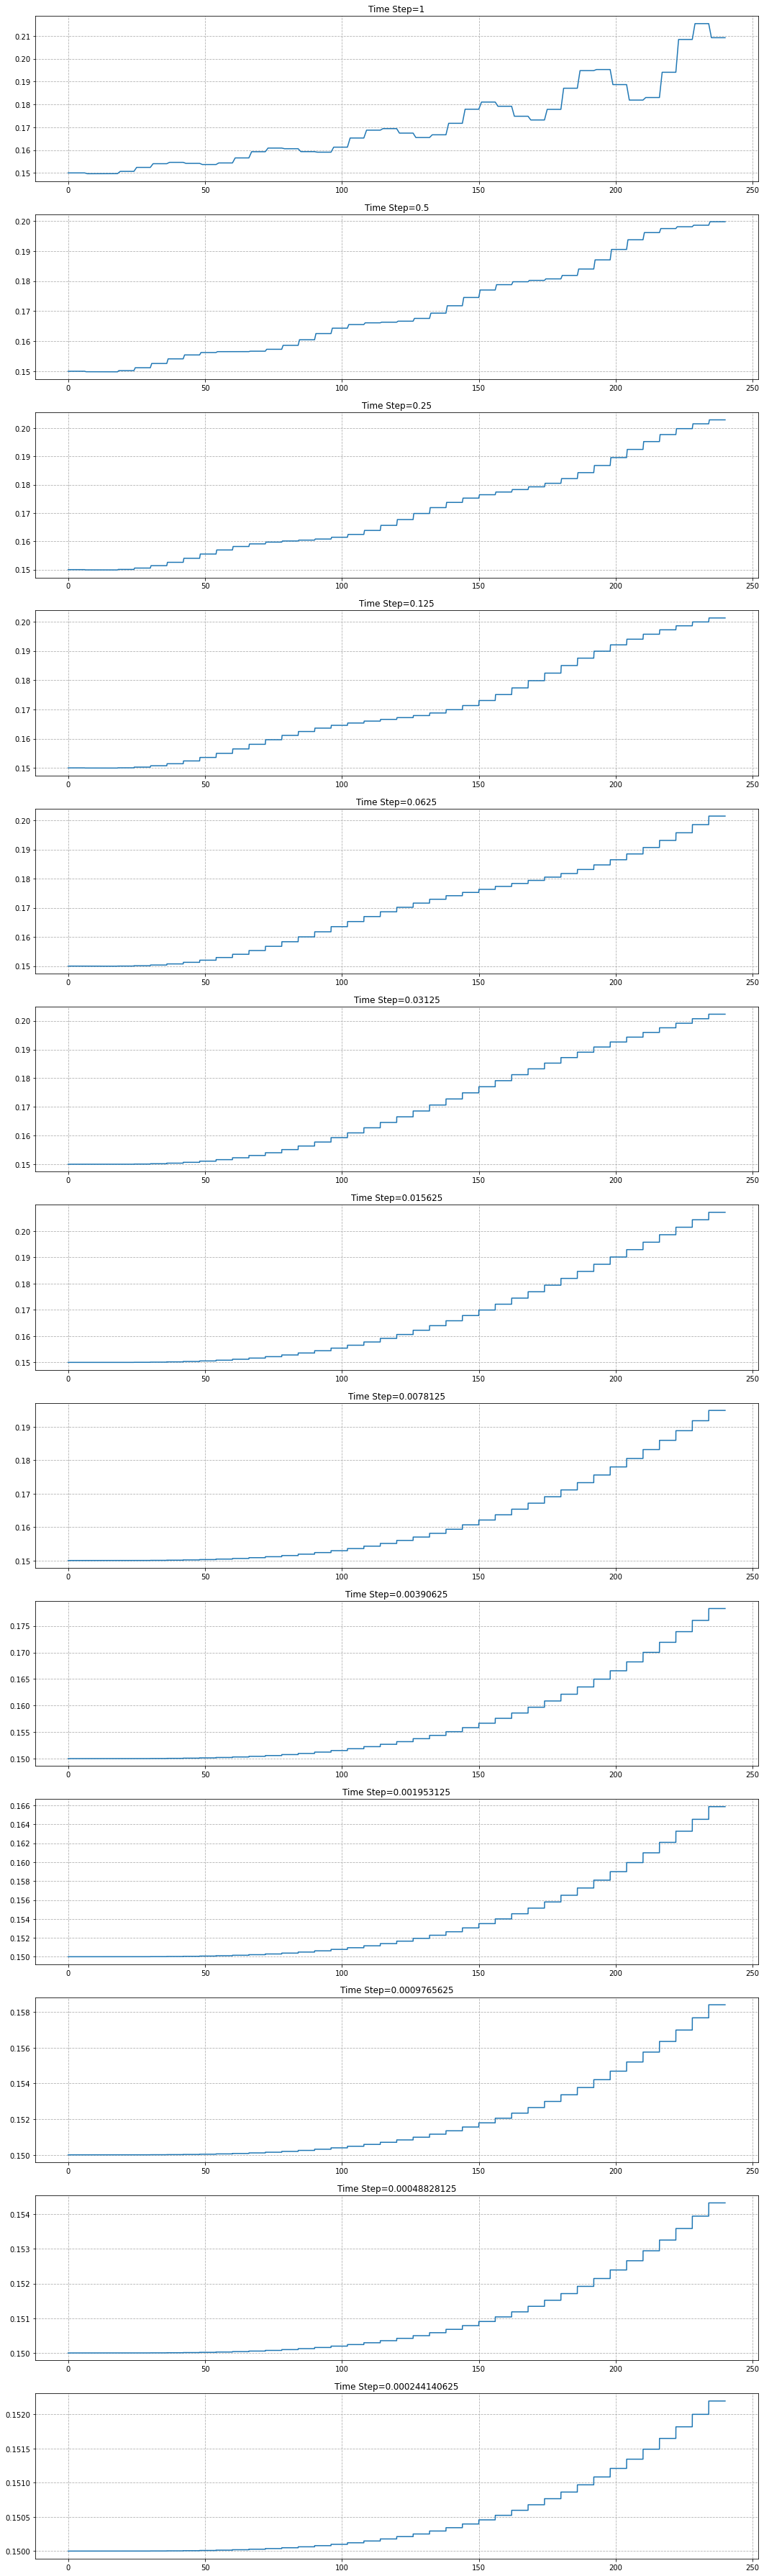

In [ ]:
fig,ax = plt.subplots(len(step_range),1)
fig.set_size_inches(18,len(step_range)*5)
for i,s in enumerate(step_range):
    ax[i].plot(price[s])
    ax[i].grid(True,linestyle='--')
    ax[i].title.set_text(f'Time Step={s}')

In [ ]:
[(p,price[p].max()) for p in price]

[(1, 0.2154026132602713),
 (0.5, 0.199754914743738),
 (0.25, 0.2028996029925619),
 (0.125, 0.2012584174693971),
 (0.0625, 0.2014625639090784),
 (0.03125, 0.2023077419080591),
 (0.015625, 0.2071125041927034),
 (0.0078125, 0.1948900849064567),
 (0.00390625, 0.1782738393740068),
 (0.001953125, 0.1658711966127201),
 (0.0009765625, 0.1584083727764662),
 (0.00048828125, 0.1543276167707253),
 (0.000244140625, 0.1521953374565361)]

## Differentiating the price time series

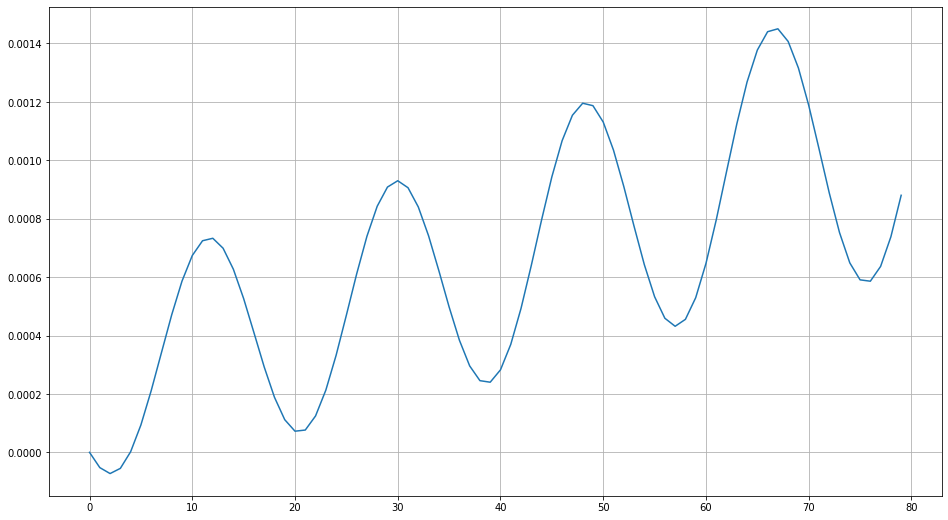

In [6]:
y=price.loc[:,'Electricity Tariff'].to_numpy()
dif=[]
for i,p in enumerate(y):
    if (i-1)%(8*paramaters['Tariff Correction Period'])==0:
        dif.append(y[i]-y[i-1])
plt.figure(figsize=(16,9))
plt.grid()
plt.plot(dif)

## Finding the location of exterma

In [42]:
extrema_loc=[]
extrema_val=[]
for i,p in enumerate(dif):
    if i!=0 and i!=len(dif)-1:
        if (p < dif[i+1] and p < dif[i-1]) or (p > dif[i+1] and p > dif[i-1]):
            extrema_loc.append(i)
            extrema_val.append(p)
print(extrema_loc)

[2, 12, 20, 30, 39, 48, 57, 67, 76]


## Calculating the Freqeuncy

In [17]:
distance=np.diff(extrema_loc)
print(distance)
print(f'Average : {np.mean(distance)}')
print(f'Standard Deviation : {np.std(distance)}')
print(f'Variance : {np.var(distance)}')
fr= 1/(2*np.mean(distance))
print(f'Frequency : {fr}')

[10  8 10  9  9  9 10  9]
Average : 9.25
Standard Deviation : 0.6614378277661477
Variance : 0.4375
Frequency : 0.05405405405405406


## Calculating the Amplitude

[0.00080563 0.00066058 0.00085758 0.00068985 0.00095525 0.00076373
 0.00101858 0.00086427]


0.0008269343202096623

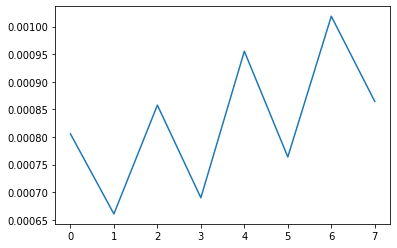

In [25]:
amp=np.abs(np.diff(extrema_val))
print(amp)
plt.plot(amp)
np.mean(amp)

In [10]:
def myshape(x,a,b,c,tc,f,phi):
    # return a*(np.exp(tc*x)-1)+b*np.sin(2*np.pi*f*x+phi)+c
    return a*x+b*np.sin(2*np.pi*f*x+phi)+c

## Estimating the Function

111.06230042810324

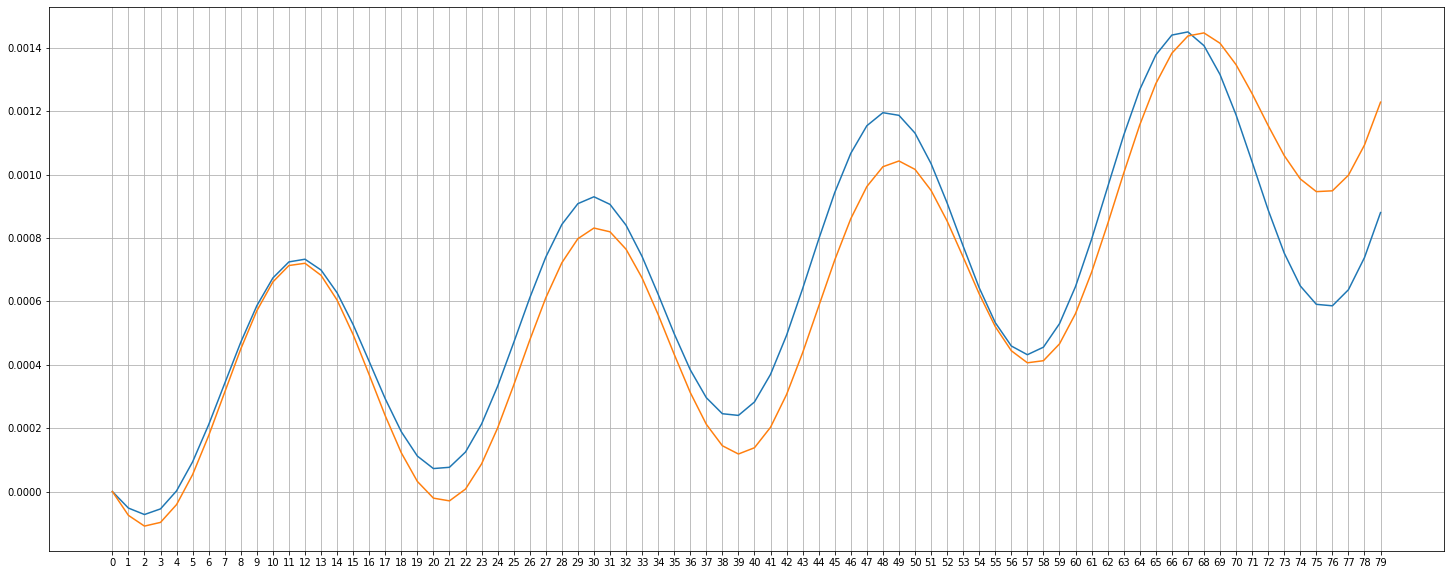

In [39]:
x=np.arange(len(dif))
Phi=np.pi*20/16
A=0.00008
B=0.0004
C=-np.sin(Phi)*B
stimated=myshape(x,a=A,b=B,c=C,tc=0.035,f=fr,phi=Phi)
plt.figure(figsize=(25,10))
# plt.grid()
plt.plot(x,dif)
plt.xticks(x)
plt.plot(x,stimated)
plt.grid(which='both')
np.mean(abs(dif-stimated))*1000000